<a href="https://colab.research.google.com/github/LionelAgo/Channel_180/blob/master/Channel_180.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
--- 

**Turbulent Channel Flow: $Re_{\tau}=180 \;\;--\;\;(L_x = 8\pi \; \& \; L_z = 4\pi)$  -  [raw data](https://www.dropbox.com/sh/ak1mxjh6aq8isr0/AAClWFzZV7S3OXQ9mx7TXxmra/Channel_180)**

---
---
Authors: Lionel Agostini and Peter Vincent (l.agostini@imperial.ac.uk)

                

 name |  parameters
--- | ---
Solver:   |  DNS were undertaken using [PyFR](http://www.pyfr.org/) :
          |    - based on the high-order flux reconstruction method of Huynh
          | - compressible solver
          | - a Rusanov Riemann solver was employed to calculate the inter-element fluxes
          | - an explicit RK45[2R+] scheme was used to advance the solution in time
Initial condition | Channel-02000.0000.pyfrs
Mesh file         | Channel-180.pyfrm
Reynolds number   | $Re_{\tau}$=180
Domain size       | $(Lx,Ly,Lz)/h=(8\pi,2,4\pi)$
Domain mesh       | $62 \times 19 \times 60$ hexahedral elements
Resolution        | Fifth-order polynomial
Number of snapshots| 87 {$\rho$,u,v,w} (611 MB each)
Total size         |53.2 GB.
Name               |Channel-xxxx
Number of statistics files |197 (122 MB each)
Total Size         |24 GB.
Name:              | avg-xxxx
Statsaveraging window  |from 2000 to 6300




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:
# Run only the first time
# Create directory and download packages

%cd /content/gdrive/My Drive/
%mkdir Colab_Notebooks
%cd Colab_Notebooks
%mkdir Channel180
%cd Channel180
!git clone https://github.com/PyFR/PyFR
!git clone https://github.com/LionelAgo/Channel_180



In [ ]:
# Load packages
import sys
sys.path.append('/content/gdrive/My Drive/Colab_Notebooks/Channel180/PyFR')
sys.path.append('/content/gdrive/My Drive/Colab_Notebooks/Channel180/Channel_180')

! pip install wget
import wget
import numpy as np
import matplotlib.pyplot as plt
import h5py
import importlib

from Channel_180 import PP
importlib.reload(PP)
from PP import extract_grid
from PP import Read_solutions
from PP import Read_stats
from PP import MeanXZ
from PP import MeanZ
from PP import wallunit

In [ ]:
#Constants#
rhom = 0.014
tauw = 5.92464e-05
utau=(tauw/rhom)**0.5
mu = 5.05967e-06
Retau=(rhom/mu)*utau

#Grid#
Mesh,Lx,Ly,Lz =extract_grid()
X,Y,Z=np.meshgrid(Lx,Ly,Lz, indexing='ij')
X=X*Retau
Y=Y*Retau
Z=Z*Retau
yp=(Ly[:int(1+np.floor(len(Ly)/2))]+1)*Retau

Channel-180.pyfrm


# Part 1 - Snapshots - 3D volume data#

In [ ]:
#@title Select timestep
#Ti = 28 #@param {type:"slider", min:0, max:86, step:1}
Ti = 21 #@param {type:"slider", min:0, max:29, step:1}
timesteps=np.arange(2050,6400,50)

print(f'Time step : T={timesteps[Ti]}')

rho,rhou,rhov,rhow,E=Read_solutions(timesteps[Ti])

Time step : T=3100
https://www.dropbox.com/sh/ak1mxjh6aq8isr0/AAAFcWRthFH-AaRsE-2deQAVa/Channel_180/snapshots/Channel-03100.0000.pyfrs?dl=1


In [ ]:
#@title Velocity components 
Ui = 1 #@param {type:"slider", min:1, max:3, step:1}

if Ui==1:
  Va=rhou/rho
  print('Streamwise velocity field')
elif Ui==2:
  Va=rhov/rho
  print('Wall-normal velocity field')
elif Ui==3:
  Va=rhow/rho  
  print('Spanwise velocity field')




Streamwise velocity field


wall-normal location : yp=10.482525144154437


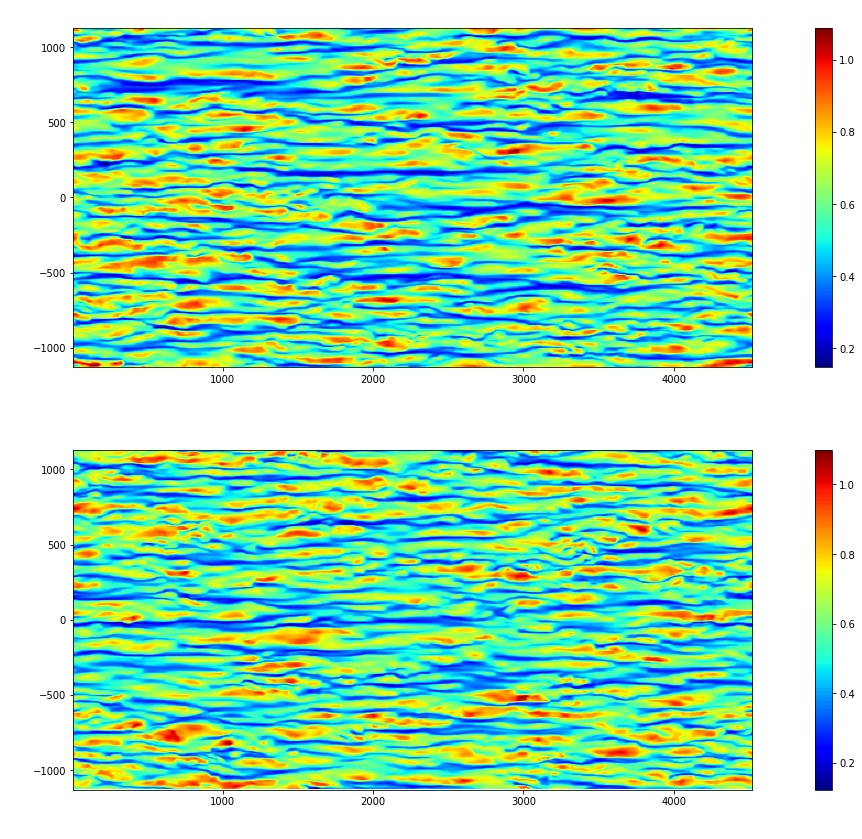

In [ ]:
#@title  Plot slice normal to Y
yi = 8 #@param {type:"slider", min:0, max:57, step:1}
print(f'wall-normal location : yp={yp[yi]}')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), tight_layout=True)
cs=ax1.imshow(np.squeeze(Va[:,yi,:]).T,extent=[np.squeeze(X[0,0,0]), np.squeeze(X[-1,0,0]) , np.squeeze(Z[0,0,0]), np.squeeze(Z[0,0,-1])], cmap='jet', origin='lower', interpolation='spline16')

tit='Lower wall : ' + f'yp={(yp[yi])}'
ax1.set_title(tit, color = 'w', fontsize=20)
ax1.set_ylabel(r'$z^+$', color = 'w', fontsize=20)
ax1.set_xlabel(r'$x^+$', color = 'w', fontsize=20)
plt.colorbar(cs,ax=ax1)

cs=ax2.imshow(np.squeeze(Va[:,113-yi,:]).T,extent=[np.squeeze(X[0,0,0]), np.squeeze(X[-1,0,0]) , np.squeeze(Z[0,0,0]), np.squeeze(Z[0,0,-1])], cmap='jet', origin='lower', interpolation='spline16')

tit='Upper wall : ' + f'yp={(yp[yi])}'
ax2.set_title(tit, color = 'w', fontsize=20)
ax2.set_ylabel(r'$z^+$', color = 'w', fontsize=20)
ax2.set_xlabel(r'$x^+$', color = 'w', fontsize=20)
plt.colorbar(cs,ax=ax2)
plt.rcParams.update({'font.size': 18})

Text(0.5, 0, '$x^+$')

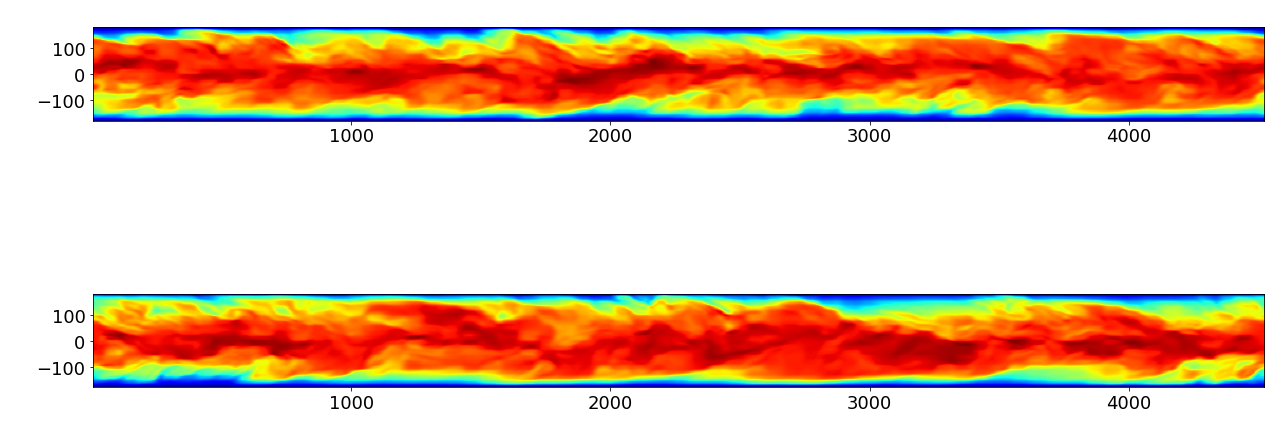

In [ ]:
#@title  Plot slice normal to Z
zi = 8 #@param {type:"slider", min:0, max:180, step:1}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), tight_layout=True)
cs=ax1.imshow(np.squeeze(Va[:,:,zi]).T,extent=[np.squeeze(X[0,0,0]), np.squeeze(X[-1,0,0]) , np.squeeze(Y[0,0,0]), np.squeeze(Y[0,-1,0])], cmap='jet', origin='lower', interpolation='spline16')

tit='Section normal to Z : ' + f'zp={int(Z[0,0,zi])}'
ax1.set_title(tit, color = 'w', fontsize=20)
ax1.set_ylabel(r'$y^+$', color = 'w', fontsize=20)
ax1.set_xlabel(r'$x^+$', color = 'w', fontsize=20)
#plt.colorbar(cs,ax=ax1)

cs=ax2.imshow(np.squeeze(Va[:,:,360-
zi]).T,extent=[np.squeeze(X[0,0,0]), np.squeeze(X[-1,0,0]) , np.squeeze(Y[0,0,0]), np.squeeze(Y[0,-1,0])], cmap='jet', origin='lower', interpolation='spline16')

tit='Section normal to Z : ' + f'zp={int(Z[0,0,360-zi])}'
ax2.set_title(tit, color = 'w', fontsize=20)
ax2.set_ylabel(r'$y^+$', color = 'w', fontsize=20)
ax2.set_xlabel(r'$x^+$', color = 'w', fontsize=20)
#plt.colorbar(cs,ax=ax2)


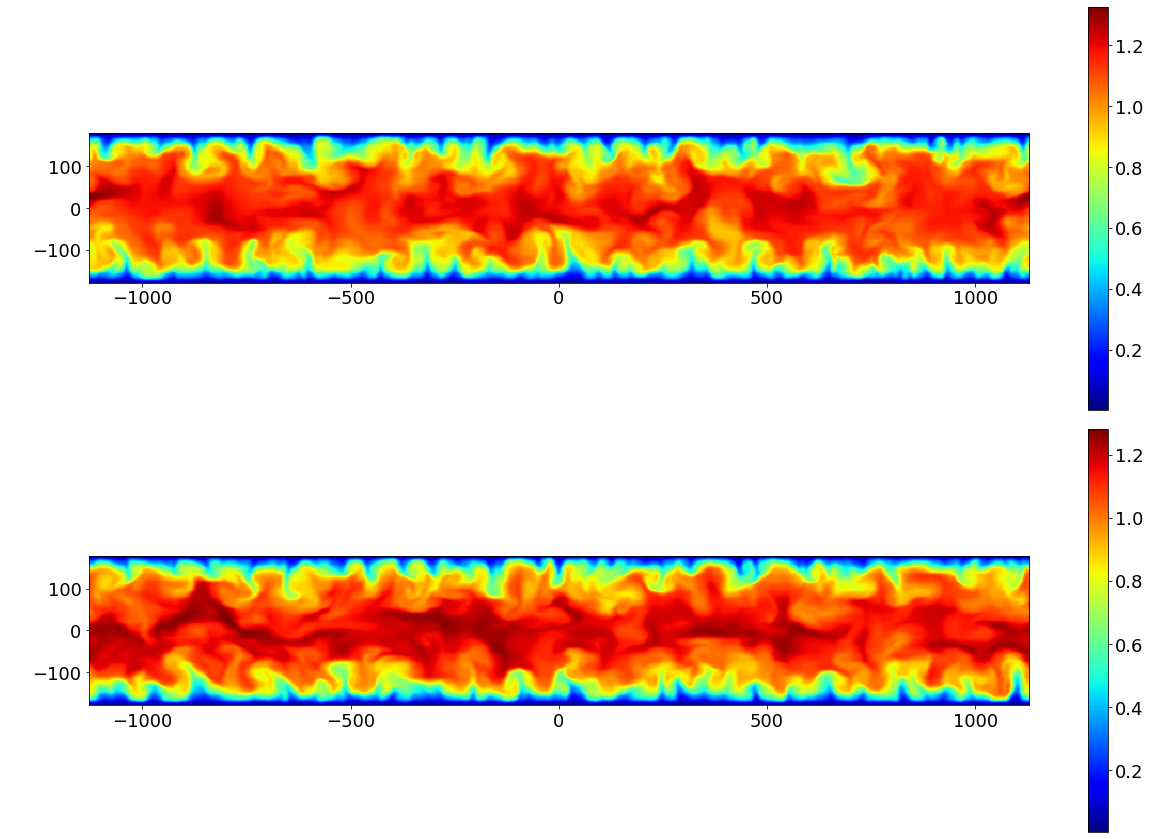

In [ ]:
#@title  Plot slice normal to X
xi = 10 #@param {type:"slider", min:0, max:185, step:1}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), tight_layout=True)
cs=ax1.imshow(np.squeeze(Va[:,:,150]).T,extent=[np.squeeze(X[0,0,0]), np.squeeze(X[-1,0,0]) , np.squeeze(Y[0,0,0]), np.squeeze(Y[0,-1,0])], cmap='jet', origin='lower', interpolation='spline16')

cs=ax1.imshow(np.squeeze(Va[xi,:,:]),extent=[np.squeeze(Z[0,0,0]), np.squeeze(Z[0,0,-1]) , np.squeeze(Y[0,0,0]), np.squeeze(Y[0,-1,0])], cmap='jet', origin='lower', interpolation='spline16')
tit='Section normal to X : ' + f'xp={int(X[xi,0,0])}'
ax1.set_title(tit, color = 'w', fontsize=20)
ax1.set_ylabel(r'$z^+$', color = 'w', fontsize=20)
ax1.set_xlabel(r'$y^+$', color = 'w', fontsize=20)
plt.colorbar(cs,ax=ax1)


cs=ax2.imshow(np.squeeze(Va[372-xi,:,:]),extent=[np.squeeze(Z[0,0,0]), np.squeeze(Z[0,0,-1]) , np.squeeze(Y[0,0,0]), np.squeeze(Y[0,-1,0])], cmap='jet', origin='lower', interpolation='spline16')
tit='Section normal to X : ' + f'xp={int(X[372-xi,0,0])}'
ax2.set_title(tit, color = 'w', fontsize=20)
ax2.set_ylabel(r'$z^+$', color = 'w', fontsize=20)
ax2.set_xlabel(r'$y^+$', color = 'w', fontsize=20)
plt.colorbar(cs,ax=ax2)

## Statistics from snapshots ##

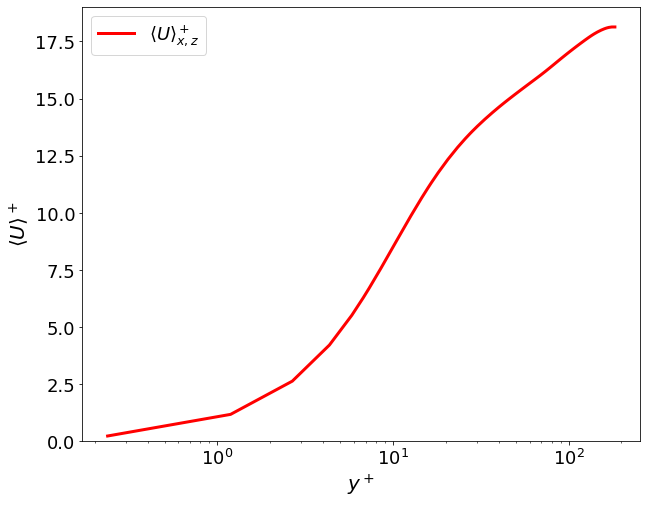

In [ ]:

f, ax = plt.subplots(1, 1, sharey=True,figsize=(10, 8),  facecolor='w', edgecolor='k') 


Var=rhou/rho
nn=1
sym=1
# plot  <var>_x,z,t vs y
_, Varp=MeanXZ(Var,utau,normi=nn,sym=sym)
ax.semilogx(yp,Varp,'r-',linewidth=3, label=r'$\left< U \right>^+_{x,z}$')


ax.set_xlabel(r'$y^+$', fontsize=20)
ax.set_ylabel(r'$\left<U \right>^+$', fontsize=20)
ax.set_ylim(ymin=0)
#ax.set_xlim(yp[0],yp[-1])
ax.legend()


In [ ]:
def CoVar(V1,V2):
  Vm=np.mean(np.mean(V1,2),0)
  _,V1m,_=np.meshgrid(np.squeeze(X[:,0,0]),Vm, np.squeeze(Z[0,0,:]),indexing='ij')
  V1p=V1-V1m

  Vm=np.mean(np.mean(V2,2),0)
  _,V2m,_=np.meshgrid(np.squeeze(X[:,0,0]),Vm, np.squeeze(Z[0,0,:]),indexing='ij')
  V2p=V2-V2m

  return V1p*V2p

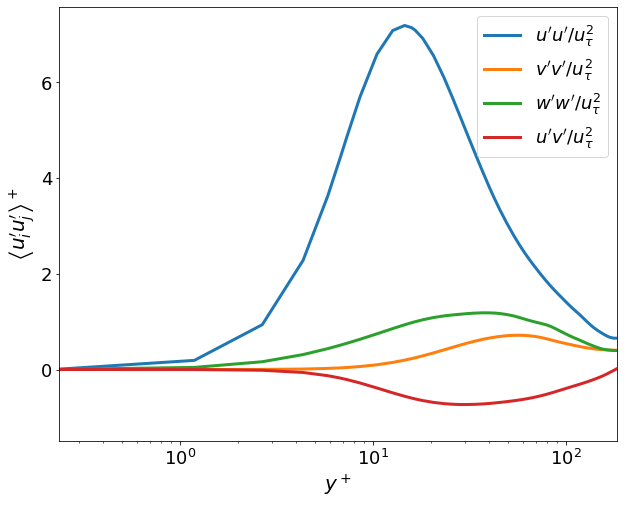

In [ ]:
f, ax = plt.subplots(1, 1, sharey=True,figsize=(10, 8),  facecolor='w', edgecolor='k') 

for i in np.arange(4):
  sym=1
  if i==0:
    V1=rhou/rho
    V2=V1
    vari=r'$u^{\prime}u^{\prime}/u_{\tau}^2$'
  elif i==1:
    V1=rhov/rho
    V2=V1
    vari=r'$v^{\prime}v^{\prime}/u_{\tau}^2$'
  elif i==2:
    V1=rhow/rho
    V2=V1
    vari=r'$w^{\prime}w^{\prime}/u_{\tau}^2$'
  elif i==3:
    V1=rhou/rho
    V2=rhov/rho    
    sym=-1
    vari=r'$u^{\prime}v^{\prime}/u_{\tau}^2$'

  VV = CoVar(V1,V2)
  _, Varp=MeanXZ(VV,utau,normi=2,sym=sym)
  ax.semilogx(yp,Varp,'-',linewidth=3, label=vari)
  
ax.set_xlabel(r'$y^+$', fontsize=20)
ax.set_ylabel(r'$\left<u_i^{\prime} u_j^{\prime} \right>^+$', fontsize=20)
ax.set_ylim(ymin=-1.5)
ax.set_xlim(yp[0],yp[-1])
ax.legend()  


# Part 2 -  Statistics Fields #

## Components ##

In [ ]:
list_stats=['pppu','pppv','pppw','ppuu','ppuv','ppuw','ppvv','ppvw','ppww','puuu','puuv','puvv','puvw','puww','pvvv','pvvw','pvww','pwww','uuuu','uuuv','uuuw','uuvv','uuvw','uvvv','uvvw','uvww','uwww','vvvv','vvvw','vvww','vwww','wwww','P-eps-four-part','T-eps-x-part','T-eps-y-part','T-eps-z-part','T-eps-c-part','B-eps-c-part','B-eps-grad-p-x-grad-rho-x-invrhosq','B-eps-grad-p-x-grad-rho-y-invrhosq','B-eps-grad-p-x-grad-rho-z-invrhosq','B-eps-grad-p-y-grad-rho-x-invrhosq','B-eps-grad-p-y-grad-rho-y-invrhosq','B-eps-grad-p-y-grad-rho-z-invrhosq','B-eps-grad-p-z-grad-rho-x-invrhosq','B-eps-grad-p-z-grad-rho-y-invrhosq','B-eps-grad-p-z-grad-rho-z-invrhosq','rho','u','v','w','p','RT','uu','uv','uw','vv','vw','ww','rhou','rhov','rhow','pu','pv','pw','pp','puu','puv','puw','pvv','pvw','pww','ppp','ppu','ppv','ppw','rhouu','rhouv','rhouw','rhovv','rhovw','rhoww','grad-u-x','grad-u-y','grad-u-z','grad-v-x','grad-v-y','grad-v-z','grad-w-x','grad-w-y','grad-w-z','u-grad-u-x','u-grad-u-y','u-grad-u-z','u-grad-v-x','u-grad-v-y','u-grad-v-z','u-grad-w-x','u-grad-w-y','u-grad-w-z','v-grad-u-x','v-grad-u-y','v-grad-u-z','v-grad-v-x','v-grad-v-y','v-grad-v-z','v-grad-w-x','v-grad-w-y','v-grad-w-z','w-grad-u-x','w-grad-u-y','w-grad-u-z','w-grad-v-x','w-grad-v-y','w-grad-v-z','w-grad-w-x','w-grad-w-y','w-grad-w-z','p-grad-u-x','p-grad-u-y','p-grad-u-z','p-grad-v-x','p-grad-v-y','p-grad-v-z','p-grad-w-x','p-grad-w-z','uuu','uuv','uuw','uvv','uvw','uww','vvv','vvw','vww','www','rhouuu','rhouuv','rhouuw','rhouvv','rhouvw','rhouww','rhovvv','rhovvw','rhovww','rhowww','invrho','umag','c','M','pt','rhoRTRT','grad-u-x-grad-u-x','grad-u-x-grad-u-y','grad-u-x-grad-u-z','grad-u-x-grad-v-x','grad-u-x-grad-v-y','grad-u-x-grad-v-z','grad-u-x-grad-w-x','grad-u-x-grad-w-y','grad-u-x-grad-w-z','grad-u-y-grad-u-y','grad-u-y-grad-u-z','grad-u-y-grad-v-x','grad-u-y-grad-v-y','grad-u-y-grad-v-z','grad-u-y-grad-w-x','grad-u-y-grad-w-y','grad-u-y-grad-w-z','grad-u-z-grad-u-z','grad-u-z-grad-v-x','grad-u-z-grad-v-y','grad-u-z-grad-v-z','grad-u-z-grad-w-x','grad-u-z-grad-w-y','grad-u-z-grad-w-z','grad-v-x-grad-v-x','grad-v-x-grad-v-y','grad-v-x-grad-v-z','grad-v-x-grad-w-x','grad-v-x-grad-w-y','grad-v-x-grad-w-z','grad-v-y-grad-v-y','grad-v-y-grad-v-z','grad-v-y-grad-w-x','grad-v-y-grad-w-y','grad-v-y-grad-w-z','grad-v-z-grad-v-z','grad-v-z-grad-w-x','grad-v-z-grad-w-y','grad-v-z-grad-w-z','grad-w-x-grad-w-x','grad-w-x-grad-w-y','grad-w-x-grad-w-z','grad-w-y-grad-w-y','grad-w-y-grad-w-z','grad-w-z-grad-w-z']
list_stats=sorted(list_stats)
list_stats


In [ ]:
Var = "grad-u-z" #@param ['B-eps-c-part', 'B-eps-grad-p-x-grad-rho-x-invrhosq', 'B-eps-grad-p-x-grad-rho-y-invrhosq', 'B-eps-grad-p-x-grad-rho-z-invrhosq', 'B-eps-grad-p-y-grad-rho-x-invrhosq', 'B-eps-grad-p-y-grad-rho-y-invrhosq', 'B-eps-grad-p-y-grad-rho-z-invrhosq', 'B-eps-grad-p-z-grad-rho-x-invrhosq', 'B-eps-grad-p-z-grad-rho-y-invrhosq', 'B-eps-grad-p-z-grad-rho-z-invrhosq', 'M', 'P-eps-four-part', 'RT', 'T-eps-c-part', 'T-eps-x-part', 'T-eps-y-part', 'T-eps-z-part', 'c', 'grad-u-x', 'grad-u-x-grad-u-x', 'grad-u-x-grad-u-y', 'grad-u-x-grad-u-z', 'grad-u-x-grad-v-x', 'grad-u-x-grad-v-y', 'grad-u-x-grad-v-z', 'grad-u-x-grad-w-x', 'grad-u-x-grad-w-y', 'grad-u-x-grad-w-z', 'grad-u-y', 'grad-u-y-grad-u-y', 'grad-u-y-grad-u-z', 'grad-u-y-grad-v-x', 'grad-u-y-grad-v-y', 'grad-u-y-grad-v-z', 'grad-u-y-grad-w-x', 'grad-u-y-grad-w-y', 'grad-u-y-grad-w-z', 'grad-u-z', 'grad-u-z-grad-u-z', 'grad-u-z-grad-v-x', 'grad-u-z-grad-v-y', 'grad-u-z-grad-v-z', 'grad-u-z-grad-w-x', 'grad-u-z-grad-w-y', 'grad-u-z-grad-w-z', 'grad-v-x', 'grad-v-x-grad-v-x', 'grad-v-x-grad-v-y', 'grad-v-x-grad-v-z', 'grad-v-x-grad-w-x', 'grad-v-x-grad-w-y', 'grad-v-x-grad-w-z', 'grad-v-y', 'grad-v-y-grad-v-y', 'grad-v-y-grad-v-z', 'grad-v-y-grad-w-x', 'grad-v-y-grad-w-y', 'grad-v-y-grad-w-z', 'grad-v-z', 'grad-v-z-grad-v-z', 'grad-v-z-grad-w-x', 'grad-v-z-grad-w-y', 'grad-v-z-grad-w-z', 'grad-w-x', 'grad-w-x-grad-w-x', 'grad-w-x-grad-w-y', 'grad-w-x-grad-w-z', 'grad-w-y', 'grad-w-y-grad-w-y', 'grad-w-y-grad-w-z', 'grad-w-z', 'grad-w-z-grad-w-z', 'invrho', 'p', 'p-grad-u-x', 'p-grad-u-y', 'p-grad-u-z', 'p-grad-v-x', 'p-grad-v-y', 'p-grad-v-z', 'p-grad-w-x', 'p-grad-w-z', 'pp', 'ppp', 'pppu', 'pppv', 'pppw', 'ppu', 'ppuu', 'ppuv', 'ppuw', 'ppv', 'ppvv', 'ppvw', 'ppw', 'ppww', 'pt', 'pu', 'puu', 'puuu', 'puuv', 'puv', 'puvv', 'puvw', 'puw', 'puww', 'pv', 'pvv', 'pvvv', 'pvvw', 'pvw', 'pvww', 'pw', 'pww', 'pwww', 'rho', 'rhoRTRT', 'rhou', 'rhouu', 'rhouuu', 'rhouuv', 'rhouuw', 'rhouv', 'rhouvv', 'rhouvw', 'rhouw', 'rhouww', 'rhov', 'rhovv', 'rhovvv', 'rhovvw', 'rhovw', 'rhovww', 'rhow', 'rhoww', 'rhowww', 'u', 'u-grad-u-x', 'u-grad-u-y', 'u-grad-u-z', 'u-grad-v-x', 'u-grad-v-y', 'u-grad-v-z', 'u-grad-w-x', 'u-grad-w-y', 'u-grad-w-z', 'umag', 'uu', 'uuu', 'uuuu', 'uuuv', 'uuuw', 'uuv', 'uuvv', 'uuvw', 'uuw', 'uv', 'uvv', 'uvvv', 'uvvw', 'uvw', 'uvww', 'uw', 'uww', 'uwww', 'v', 'v-grad-u-x', 'v-grad-u-y', 'v-grad-u-z', 'v-grad-v-x', 'v-grad-v-y', 'v-grad-v-z', 'v-grad-w-x', 'v-grad-w-y', 'v-grad-w-z', 'vv', 'vvv', 'vvvv', 'vvvw', 'vvw', 'vvww', 'vw', 'vww', 'vwww', 'w', 'w-grad-u-x', 'w-grad-u-y', 'w-grad-u-z', 'w-grad-v-x', 'w-grad-v-y', 'w-grad-v-z', 'w-grad-w-x', 'w-grad-w-y', 'w-grad-w-z', 'ww', 'www', 'wwww'] {allow-input: true}
Va=Read_stats(Var)

https://www.dropbox.com/sh/ak1mxjh6aq8isr0/AAC_N9jt809zE5BfJrrc1Bcaa/Channel_180/statistics_5/avg-grad-u-z.pyfrs?dl=1


wall-normal location : yp=183.64181171983603


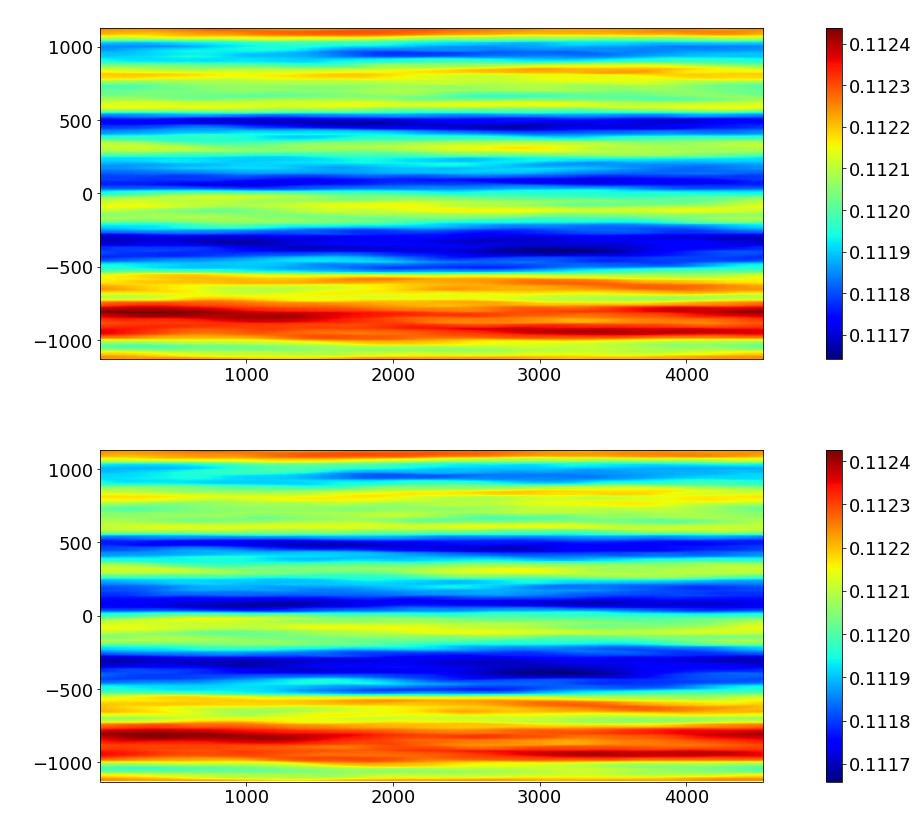

In [ ]:
#@title  Plot slice normal to Y
yi = 57 #@param {type:"slider", min:0, max:57, step:1}
print(f'wall-normal location : yp={yp[yi]}')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), tight_layout=True)
cs=ax1.imshow(np.squeeze(Va[:,yi,:]).T,extent=[np.squeeze(X[0,0,0]), np.squeeze(X[-1,0,0]) , np.squeeze(Z[0,0,0]), np.squeeze(Z[0,0,-1])], cmap='jet', origin='lower', interpolation='spline16')

tit='Lower wall : ' + f'yp={(yp[yi])}'
ax1.set_title(tit, color = 'w', fontsize=20)
ax1.set_ylabel(r'$z^+$', color = 'w', fontsize=20)
ax1.set_xlabel(r'$x^+$', color = 'w', fontsize=20)
plt.colorbar(cs,ax=ax1)

cs=ax2.imshow(np.squeeze(Va[:,113-yi,:]).T,extent=[np.squeeze(X[0,0,0]), np.squeeze(X[-1,0,0]) , np.squeeze(Z[0,0,0]), np.squeeze(Z[0,0,-1])], cmap='jet', origin='lower', interpolation='spline16')

tit='Upper wall : ' + f'yp={(yp[yi])}'
ax2.set_title(tit, color = 'w', fontsize=20)
ax2.set_ylabel(r'$z^+$', color = 'w', fontsize=20)
ax2.set_xlabel(r'$x^+$', color = 'w', fontsize=20)
plt.colorbar(cs,ax=ax2)
plt.rcParams.update({'font.size': 18})

Text(0.5, 0, '$x^+$')

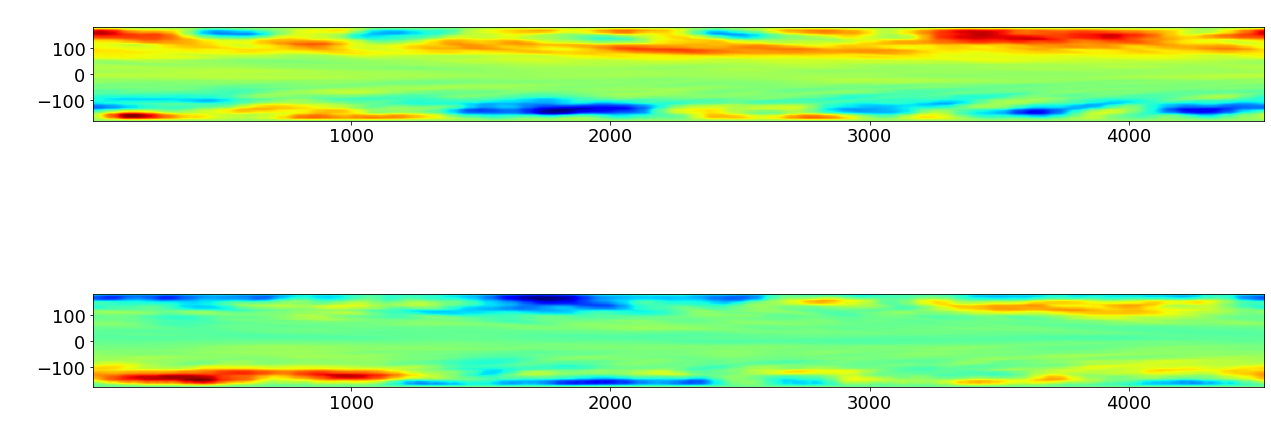

In [ ]:
#@title  Plot slice normal to Z
zi = 8 #@param {type:"slider", min:0, max:180, step:1}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), tight_layout=True)
cs=ax1.imshow(np.squeeze(Va[:,:,zi]).T,extent=[np.squeeze(X[0,0,0]), np.squeeze(X[-1,0,0]) , np.squeeze(Y[0,0,0]), np.squeeze(Y[0,-1,0])], cmap='jet', origin='lower', interpolation='spline16')

tit='Section normal to Z : ' + f'zp={int(Z[0,0,zi])}'
ax1.set_title(tit, color = 'w', fontsize=20)
ax1.set_ylabel(r'$y^+$', color = 'w', fontsize=20)
ax1.set_xlabel(r'$x^+$', color = 'w', fontsize=20)
#plt.colorbar(cs,ax=ax1)

cs=ax2.imshow(np.squeeze(Va[:,:,360-
zi]).T,extent=[np.squeeze(X[0,0,0]), np.squeeze(X[-1,0,0]) , np.squeeze(Y[0,0,0]), np.squeeze(Y[0,-1,0])], cmap='jet', origin='lower', interpolation='spline16')

tit='Section normal to Z : ' + f'zp={int(Z[0,0,360-zi])}'
ax2.set_title(tit, color = 'w', fontsize=20)
ax2.set_ylabel(r'$y^+$', color = 'w', fontsize=20)
ax2.set_xlabel(r'$x^+$', color = 'w', fontsize=20)
#plt.colorbar(cs,ax=ax2)


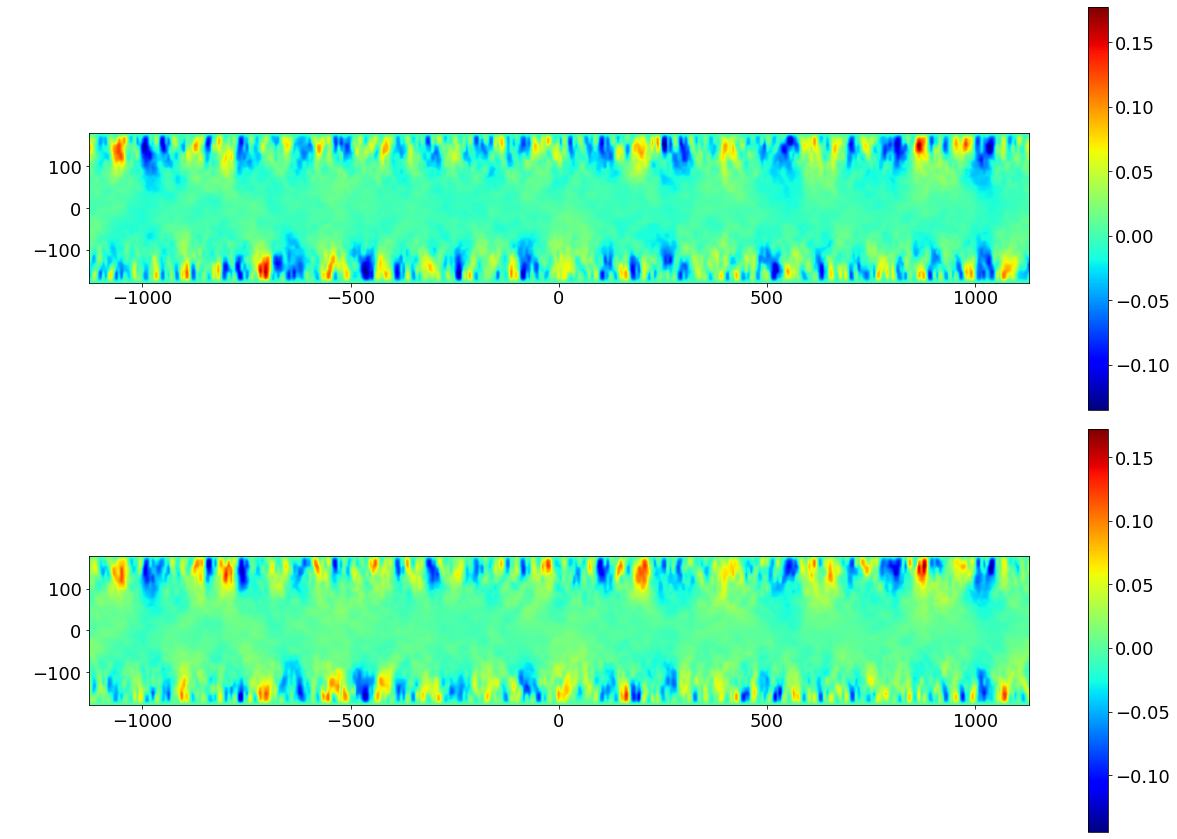

In [ ]:
#@title  Plot slice normal to X
xi = 10 #@param {type:"slider", min:0, max:185, step:1}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), tight_layout=True)
cs=ax1.imshow(np.squeeze(Va[:,:,150]).T,extent=[np.squeeze(X[0,0,0]), np.squeeze(X[-1,0,0]) , np.squeeze(Y[0,0,0]), np.squeeze(Y[0,-1,0])], cmap='jet', origin='lower', interpolation='spline16')

cs=ax1.imshow(np.squeeze(Va[xi,:,:]),extent=[np.squeeze(Z[0,0,0]), np.squeeze(Z[0,0,-1]) , np.squeeze(Y[0,0,0]), np.squeeze(Y[0,-1,0])], cmap='jet', origin='lower', interpolation='spline16')
tit='Section normal to X : ' + f'xp={int(X[xi,0,0])}'
ax1.set_title(tit, color = 'w', fontsize=20)
ax1.set_ylabel(r'$z^+$', color = 'w', fontsize=20)
ax1.set_xlabel(r'$y^+$', color = 'w', fontsize=20)
plt.colorbar(cs,ax=ax1)


cs=ax2.imshow(np.squeeze(Va[372-xi,:,:]),extent=[np.squeeze(Z[0,0,0]), np.squeeze(Z[0,0,-1]) , np.squeeze(Y[0,0,0]), np.squeeze(Y[0,-1,0])], cmap='jet', origin='lower', interpolation='spline16')
tit='Section normal to X : ' + f'xp={int(X[372-xi,0,0])}'
ax2.set_title(tit, color = 'w', fontsize=20)
ax2.set_ylabel(r'$z^+$', color = 'w', fontsize=20)
ax2.set_xlabel(r'$y^+$', color = 'w', fontsize=20)
plt.colorbar(cs,ax=ax2)

## Budgets ##

In [ ]:
U=Read_stats('u')
UU=Read_stats('uu')
UU=UU-U*U

V=Read_stats('v')
VV=Read_stats('vv')
VV=VV-V*V

W=Read_stats('w')
WW=Read_stats('ww')
WW=WW-W*W

UV=Read_stats('uv')
UV=UV-U*V


 

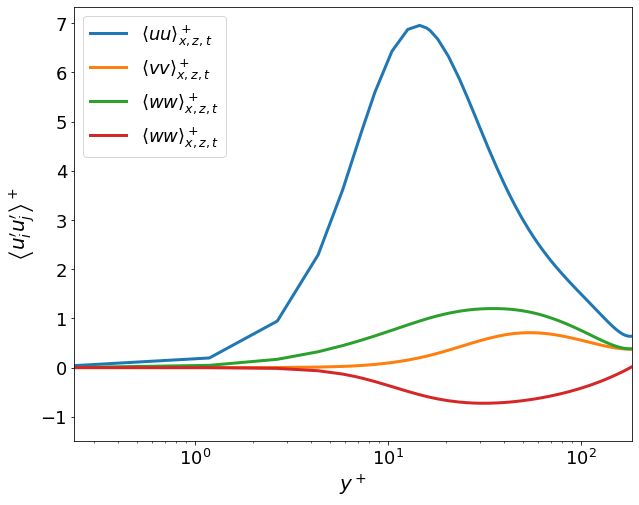

In [ ]:
f, ax = plt.subplots(1, 1, sharey=True,figsize=(10, 8),  facecolor='w', edgecolor='k') 
_, Varp=MeanXZ(UU,utau,normi=2,sym=1)
ax.semilogx(yp,Varp,'-',linewidth=3, label=r'$\left< uu\right>^+_{x,z,t}$')
_, Varp=MeanXZ(VV,utau,normi=2,sym=1)
ax.semilogx(yp,Varp,'-',linewidth=3, label=r'$\left< vv\right>^+_{x,z,t}$')
_, Varp=MeanXZ(WW,utau,normi=2,sym=1)
ax.semilogx(yp,Varp,'-',linewidth=3, label=r'$\left< ww\right>^+_{x,z,t}$')
_, Varp=MeanXZ(UV,utau,normi=2,sym=-1)
ax.semilogx(yp,Varp,'-',linewidth=3, label=r'$\left< ww\right>^+_{x,z,t}$')
ax.set_xlabel(r'$y^+$', fontsize=20)
ax.set_ylabel(r'$\left<u_i^{\prime} u_j^{\prime} \right>^+$', fontsize=20)
ax.set_ylim(ymin=-1.5)
ax.set_xlim(yp[0],yp[-1])
ax.legend()


In [ ]:
P=Read_stats('p',part=1)
PP=Read_stats('pp',part=1)
PP=PP-P*P

UUU=Read_stats('uuu',part=1)
UUU=UUU-3*UU*U-U*U*U